In [35]:
import experiment
import models

from experiment import *

In [36]:
sim = Exp()
concs = np.geomspace(0.1, 100, 10)
concs = [c*0.1e-9 for c in concs]

start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    sim.datasets[-1].add_step(start, stop, c)
    sim.datasets[-1].add_step(stop, stop*2, 0)



In [37]:
sim.model = models.Bivalent_analyte()

sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [38]:
ys = []
s='''
ymax_ds0	0.41591029	0.00115071	(0.28%)	1	0.00000000	1000.00000	True
ymax_ds1	0.42723993	0.00115394	(0.27%)	1	0.00000000	1000.00000	True
ymax_ds2	0.62791454	0.00107271	(0.17%)	1	0.00000000	1000.00000	True
ymax_ds3	0.61550114	0.00112255	(0.18%)	1	0.00000000	1000.00000	True
ymax_ds4	0.08020679	0.00175968	(2.19%)	1	0.00000000	1000.00000	True
ymax_ds5	0.21529476	0.00126312	(0.59%)	1	0.00000000	1000.00000	True
ymax_ds6	0.21443724	0.00124741	(0.58%)	1	0.00000000	1000.00000	True
ymax_ds7	0.46103913	0.00115875	(0.25%)	1	0.00000000	1000.00000	True
ymax_ds8	0.44008312	0.00116064	(0.26%)	1	0.00000000	1000.00000	True
ymax_ds9	0.61285146	0.00108373	(0.18%)	1	0.00000000	1000.00000	True
ymax_ds10	0.16421143	0.00162993	(0.99%)	1	0.00000000	1000.00000	True
ymax_ds11	0.54358444	0.00112046	(0.21%)	1	0.00000000	1000.00000	True
'''
for line in s.split('\n'):
    try:
        ys.append(float(line.split()[1]))
    except:
        pass
    

ymax=sum(ys)/len(ys)
ymax


0.4015228558333334

In [39]:
sim.params['ka1'].value =  	71132.1206	
sim.params['kd1'].value = 	0.00510879
sim.params['ka2'].value =	274.341271	
sim.params['kd2'].value =	7.39702660


sim.params['ymax'].value = 1.433118549090909


    # sim.params['ymax1'].value = 1
    # sim.params['ymax2'].value = 0.2

#ymax = sim.params['ymax'].value

In [40]:
sim.params

name,value,initial value,min,max,vary
ka1,71132.1206,10000.0,10.0000000,1.0000e+08,True
kd1,0.00510879,0.01,1.0000e-06,0.10000000,True
ka2,274.341271,0.01,1.0000e-07,10000000.0,True
kd2,7.39702660,0.01,1.0000e-07,10000000.0,True
ymax,1.43311855,1,0.00000000,1000.00000,True


In [41]:
sim.simulate_response(None, 0, 0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

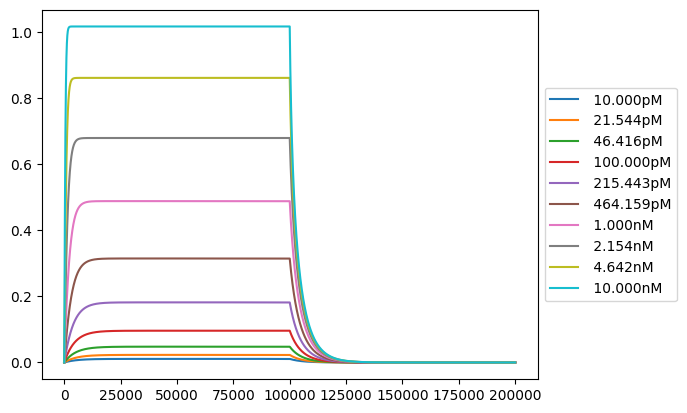

In [42]:
sim.plot()

In [43]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


In [44]:
# import numpy as np
# import scipy.optimize
# import matplotlib.pyplot as plt

# xs = np.array(xs)
# ys = np.array(ys)

# xs_fitted = np.linspace(0, xs[-1], num=100)

# def func(x, Kd):
#     return ymax*x/(Kd+x)

# p0 = (1e-6)

# params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
# print(params)
# # perform the fit
# Kd = params[0]


# # determine quality of the fit
# squaredDiffs = np.square(ys - func(xs, Kd))
# squaredDiffsFromMean = np.square(ys - np.mean(ys))
# rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(f"R² = {rSquared}")

# # plot the results
# plt.plot(xs, ys, '.', label="data")
# plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# # plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# # inspect the parameters


# plt.show()


1.0000000000000001e-11 0.010842053769034125 5.0000000000000005e-12
1.5e-11 0.016144256662296443 5.0000000000000005e-12
2.0000000000000002e-11 0.021370093620235436 5.0000000000000005e-12
2.5000000000000004e-11 0.026521596084712454 5.0000000000000005e-12
3.0000000000000006e-11 0.03160071595517339 5.0000000000000005e-12
3.500000000000001e-11 0.03660932969887349 5.0000000000000005e-12
4.000000000000001e-11 0.041549242208615236 5.0000000000000005e-12
4.500000000000001e-11 0.046422190398468954 5.0000000000000005e-12
5.0000000000000015e-11 0.051229846590187936 5.0000000000000005e-12
5.500000000000002e-11 0.05597382168256478 5.0000000000000005e-12
6.000000000000001e-11 0.060655668131176226 5.0000000000000005e-12
6.500000000000001e-11 0.06527688274900867 5.0000000000000005e-12
7e-11 0.06983890933775257 5.0000000000000005e-12
7.5e-11 0.07434314116771983 5.0000000000000005e-12
8e-11 0.07879092331311832 5.0000000000000005e-12
8.499999999999999e-11 0.08318355485138976 5.0000000000000005e-12
8.99999

(<Figure size 640x480 with 1 Axes>, <Axes: >)

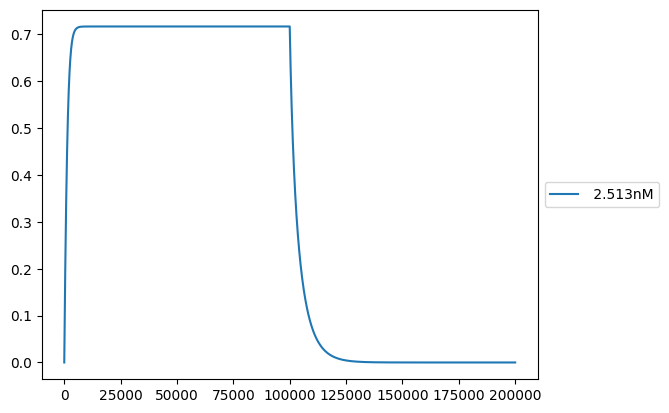

In [45]:
c=concs[-1]
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
start = sim.datasets[0].steps[0].start
stop = sim.datasets[0].steps[0].stop
diff = c/2
try:
    ymax = sim.params['ymax'].value
except:
    ymax = sim.params['ymax1'].value+sim.params['ymax2'].value+sim.params['ymax3'].value

for i in range(1000):
    temp = Exp()
    temp.model = sim.model
    temp.params = sim.params
    temp.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    temp.datasets[-1].add_step(start, stop, c)
    temp.datasets[-1].add_step(stop, stop*2, 0)
    temp.simulate_response(None, 0, 0)
    y = temp.datasets[0].response[t][-1]
    print(c, y, diff)
    
    if y<ymax/2:
        c=c+diff
    else:
        c=c-diff/2
        diff = diff/2

temp.plot()

In [ ]:
ymax

3.8948508204295473

In [25]:
3.4615e-04/0.02554522

0.013550480285548528

In [26]:
0.03420096/14226.4874

2.404034041459876e-06

In [30]:
2.404034041459876e-06*0.013550480285548528

3.2575815884589605e-08

In [ ]:
ds.response[t][0]

0.0

In [23]:
start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop,stop), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(start, stop-1000, c)
    sim.datasets[-1].add_step(stop-1000, stop, 0)